In [1]:
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import ensemble

## DATA EXPLORATION

##### Loading data and checking its structure

In [3]:
df = pd.read_csv('./train.csv')

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


##### Checking what percentage of data rows contains NaN values:

In [6]:
df_nonans=df.dropna()
print('%.2f%%' % ((df.shape[0]-df_nonans.shape[0])/df.shape[0]*100))

0.00%


##### Setting float data type to each feature:

In [7]:
for col in df:
    if df[col].dtype == 'int64':
        df[col] = df[col].astype('float64')

In [8]:
df.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
5         float64
6         float64
7         float64
8         float64
9         float64
10        float64
11        float64
12        float64
13        float64
14        float64
15        float64
16        float64
17        float64
18        float64
19        float64
20        float64
21        float64
22        float64
23        float64
24        float64
25        float64
26        float64
27        float64
28        float64
29        float64
30        float64
31        float64
32        float64
33        float64
34        float64
35        float64
36        float64
37        float64
38        float64
39        float64
40        float64
41        float64
42        float64
43        float64
44        float64
45        float64
46        float64
47        float64
48        float64
49        float64
50        float64
51        float64
52        float64
target    float64
dtype: object

##### Checking correlation matrix
###### Goal: avoid using correlated features at the training phase

<AxesSubplot:>

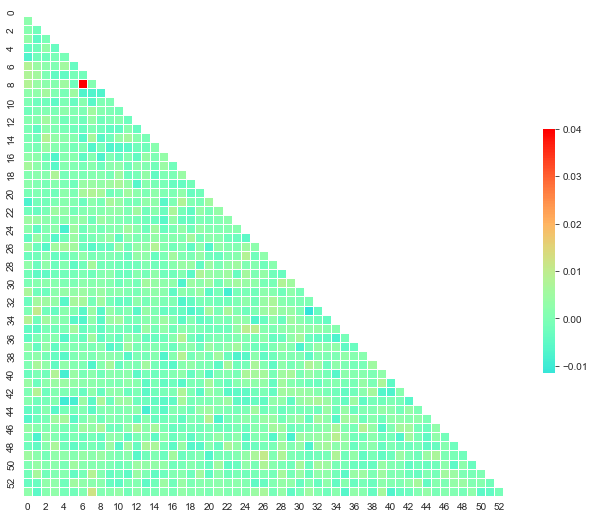

In [21]:
correlation_matrix = df[df.columns[:]].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(correlation_matrix, mask=mask, cmap='rainbow', vmax=0.04, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

##### Listing ten of the most correlated feature pairs (including target column):

In [26]:
correlation_matrix_flat = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
correlation_matrix_flat = correlation_matrix_flat[correlation_matrix_flat != 1.0]
print(correlation_matrix_flat[0:10])

6       8         0.940016
8       6         0.940016
7       target    0.012103
target  7         0.012103
33      31        0.011606
31      33        0.011606
26      49        0.010444
49      26        0.010444
33      1         0.010357
1       33        0.010357
dtype: float64


###### Note: Features 6 and 8 are highly correlated - one of them might be redundant.<br>Target values are slightly correlated to the feature 7 - it's worth adding it to the training data.

##### Checking data distributions:

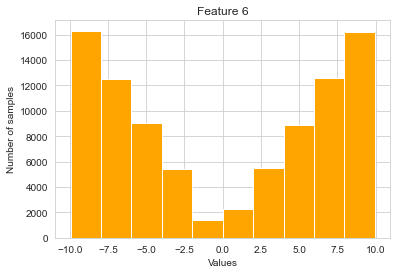

In [75]:
plt.hist(df['6'], 10, density=False, color='orange')
plt.title('Feature 6')
plt.ylabel('Number of samples')
plt.xlabel('Values')
plt.show()

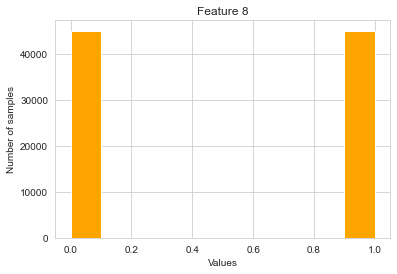

In [74]:
plt.hist(df['8'], 10, density=False, color='orange')
plt.title('Feature 8')
plt.ylabel('Number of samples')
plt.xlabel('Values')
plt.show()

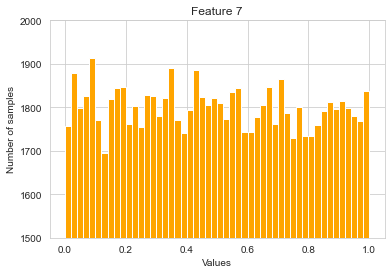

In [73]:
plt.hist(df['7'], 50, density=False, color='orange')
plt.title('Feature 7')
plt.ylim(1500, 2000)
plt.ylabel('Number of samples')
plt.xlabel('Values')
plt.show()

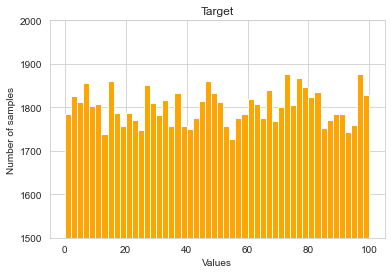

In [72]:
plt.hist(df['target'], 50, density=False, color='orange')
plt.title('Target')
plt.ylim(1500, 2000)
plt.ylabel('Number of samples')
plt.xlabel('Values')
plt.show()

##### Performing feature selection:

In [54]:
skb = SelectKBest(mutual_info_regression, k=2).fit(df.iloc[:, :-1], df.iloc[:, -1])

##### Listing two of the most relevant features:

In [56]:
X = skb.transform(df.iloc[:, :-1])
for i in range(X.shape[-1]):
    print([c for c in df.iloc[:, :-1].columns if df.iloc[:, :-1][c].iloc[0] == X[0, i]][0])

6
7


##### Plotting all feature scores representing the feature importance:

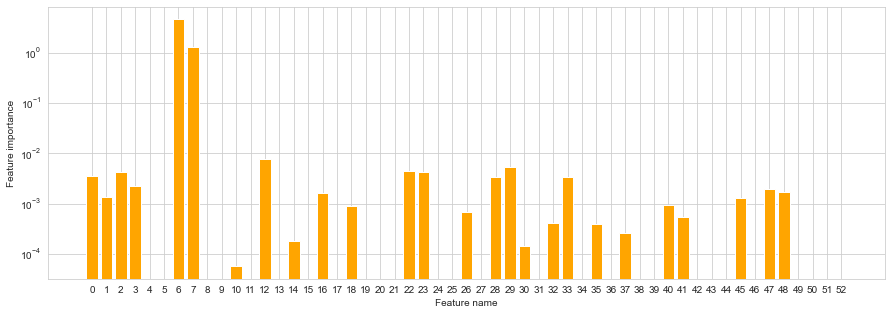

In [70]:
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(skb.scores_)), skb.scores_, color='orange')
plt.yscale('log')
plt.xticks(np.arange(df.iloc[:, :-1].shape[1]), np.arange(df.iloc[:, :-1].shape[1]))
plt.xlabel('Feature name')
plt.ylabel('Feature importance')
plt.show()

## MODEL BUILDING

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from typing import List, Optional, Dict
from hyperopt import fmin, tpe, hp, Trials
import json

In [10]:
random_state = 30
np.random.seed(random_state)

In [20]:
def evaluate_model(X: pd.DataFrame,
                   y: pd.Series,
                   cols_to_select: Optional[List[str]] = None,
                   gbr_params: Optional[Dict] = None,
                   random_state: int = 30) -> List[float]:

    kf = KFold(n_splits=10, shuffle=True, random_state=random_state)
    rmse = []
    if cols_to_select:
        X = X[cols_to_select]
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        X_train = X.iloc[train_index]
        X_test = X.iloc[test_index]
        y_train = y.iloc[train_index]
        y_test = y.iloc[test_index]
        if gbr_params is None:
            gbr = GradientBoostingRegressor(random_state=random_state)
        else:
            gbr_params['random_state'] = random_state
            gbr = GradientBoostingRegressor(**gbr_params)
        gbr.fit(X_train, y_train)
        y_test_hat = gbr.predict(X_test)
        rmse.append(mean_squared_error(y_test, y_test_hat, squared=False))
    print(f'Average RMSE: {round(np.average(rmse), 3)}')
    return rmse

##### CASE 1: evaluate model's performance trained on the entire feature matrix

In [ ]:
rmse_list = evaluate_model(df.iloc[:, :-1], df.target)

In [96]:
print(f'Average RMSE: {round(np.average(rmse_list), 4)}, standard deviation: {round(np.std(rmse_list), 4)}')

Average RMSE: 0.4204, standard deviation: 0.01


##### CASE 2: evaluate model's performance trained with the selected features

In [ ]:
rmse_list_fs = evaluate_model(df.iloc[:, :-1], df.target, cols_to_select=['6', '7'])

In [97]:
print(f'Average RMSE: {round(np.average(rmse_list_fs), 4)}, standard deviation: {round(np.std(rmse_list_fs), 4)}')

Average RMSE: 0.4191, standard deviation: 0.0102


##### Performing hyperparameter tuning

In [25]:
space = hp.choice('classifier_type',
    [
        {
            'type': 'GradientBoostingRegressor',
            'learning_rate': hp.uniform('learning_rate', 0.005, 0.2),
            'n_estimators': hp.randint('n_estimators', 50, 200)
        },
    ])

In [30]:
def objective(params):
    print(params)
    del params['type']
    rmse = evaluate_model(df.iloc[:, :-1], df.target, cols_to_select=['6', '7'], gbr_params=params)
    return np.average(rmse)

trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials)

{'learning_rate': 0.1073632616853555, 'n_estimators': 144, 'type': 'GradientBoostingRegressor'}
Average RMSE: 0.331                                   
{'learning_rate': 0.15601925118722063, 'n_estimators': 112, 'type': 'GradientBoostingRegressor'}
Average RMSE: 0.412                                                             
{'learning_rate': 0.030406197255339926, 'n_estimators': 116, 'type': 'GradientBoostingRegressor'}
Average RMSE: 1.703                                                             
{'learning_rate': 0.1455922552289762, 'n_estimators': 186, 'type': 'GradientBoostingRegressor'}
Average RMSE: 0.263                                                             
{'learning_rate': 0.1558958922312795, 'n_estimators': 104, 'type': 'GradientBoostingRegressor'}
Average RMSE: 0.44                                                               
{'learning_rate': 0.09065117222799696, 'n_estimators': 81, 'type': 'GradientBoostingRegressor'}
Average RMSE: 0.458                      

##### The best parameter set found after 50 iterations:

In [45]:
print(f"""learning rate: {round(best['learning_rate'], 3)}\n
n_estimators: {best['n_estimators']}\n
Average RMSE: {round(trials.best_trial['result']['loss'], 3)}""")

learning rate: 0.199

n_estimators: 193

Average RMSE: 0.22


##### Saving parameters to a json file:

In [64]:
gbr_params = {'learning_rate': float(best['learning_rate']),
              'n_estimators': int(best['n_estimators']),
              'random_state': random_state}
with open('./gbr_params.json', 'w') as f:
    json.dump(gbr_params, f, indent=4)